# 🔍 Deepfake Detection Project - Stage 1
## Image Classification for Fake and Real Image Detection

---

### 📖 Project Overview
This project aims to detect fake (deepfake) and real images using deep learning methods. It utilizes modern CNN architectures such as EfficientNetB7, MobileNetV3Large, VGG16, and Xception to achieve high-accuracy classification.

### 🎯 Project Objectives
- **Data Preprocessing**: Cleaning and standardizing image data
- **Model Development**: Creating effective CNN models with transfer learning
- **Performance Analysis**: Evaluating and optimizing model performance

### 📊 Dataset Information
- **Classes**: Real and Fake images
- **Image Size**: 128x128 pixels
- **Data Volume**: 10,000 images per class (Total: 20,000)
- **Source**: Image data loaded from Train folder

### 🛠️ Technologies Used
- **Python**: Main programming language
- **TensorFlow/Keras**: Deep learning framework
- **OpenCV**: Image processing
- **NumPy & Pandas**: Data manipulation
- **Matplotlib & Seaborn**: Data visualization
- **EfficientNet**: Transfer learning model

### 📋 Project Steps
1. **Setup and Library Imports**
2. **Data Loading and Preprocessing**
3. **Exploratory Data Analysis (EDA)**
4. **Data Visualization**
5. **Model Preparation and Training**
6. **Results Evaluation**

### 🔧 Requirements
- TensorFlow 2.x
- OpenCV
- scikit-learn
- matplotlib
- seaborn
- plotly
- efficientnet

---

### 🚀 Getting Started
Run the following cells to start the project:


In [1]:
!pip install efficientnet # Installing EfficientNet - Google's advanced CNN architecture that balances model accuracy and efficiency. 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.2 MB/s eta 0:00:00


In [2]:
# Mathematical & Data Processing Libraries
import numpy as np  # Numerical arrays and math operations
import pandas as pd  # Data manipulation and analysis
import pickle  # Model serialization

# Visualization Libraries
import plotly.express as px  # Interactive plots
import seaborn as sns  # Statistical visualization
import matplotlib.pyplot as plt  # Static plots

# System & Utility Libraries
import os  # File operations
from tqdm import tqdm  # Progress bars
import random  # Random sampling
import warnings  # Warning control

# Computer Vision Libraries
import cv2  # Image processing
from tensorflow.keras.preprocessing.image import img_to_array  # Image to array conversion

# Machine Learning Libraries
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import LabelBinarizer  # Label encoding
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Model evaluation

# Deep Learning Framework
import tensorflow as tf  # Core TensorFlow
from tensorflow.keras.models import Sequential, load_model, Model  # Model architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten  # CNN layers
from tensorflow.keras.layers import Dense, Activation, GlobalAveragePooling2D, Input, multiply, Lambda,Multiply  # Additional layers
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau  # Training callbacks
from tensorflow.keras.optimizers import Adam# optimizer
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.regularizers import l2

# Pre-trained Models (Transfer Learning)
from tensorflow.keras.applications import MobileNetV3Large  # Efficient mobile architecture
from tensorflow.keras.applications import EfficientNetB7  # Balanced accuracy/efficiency model
from tensorflow.keras.applications import VGG16, Xception  # Additional CNN architectures
from tensorflow.keras.applications import MobileNetV2




warnings.filterwarnings('ignore')  # Clean output

2025-08-07 09:52:28.666044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754560348.850000      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754560348.904803      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Image Configuration
image_size = 128  # Standard image dimension for CNN input
default_image_size = tuple((128, 128))  # Image resize target dimensions

In [4]:
# Image Processing Function
def load_image_array(filepath):
  try:
    img = cv2.imread(filepath)  # Load image using OpenCV
    if img is not None:
      img = cv2.resize(img, default_image_size)  # Resize to standard dimensions
      return img_to_array(img)  # Convert to numpy array for neural network
    else:
      return np.array([])
  except Exception as e:
    print(f"Error - {e}")
    return None

In [5]:
#import data\
root="/kaggle/input/deepfake-and-real-images/Dataset/Train" # Training data directory
raw_classes=os.listdir(root)  # Get class folders (Real, Fake)
print(raw_classes)


['Fake', 'Real']


In [6]:
import random
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

## IMPORTING IMAGES

In [7]:
# Data Import Function
def import_image(loc):
    df = pd.DataFrame(columns=['image', 'class'])  # Create dataframe for image metadata
    
    for j in tqdm(loc, desc="Processing folders"):  # Iterate through class folders
        folder = os.path.join(root, j)
        count=0
        for i in tqdm(os.listdir(folder), desc=f"Processing images in {j}", leave=True):
            if count == 10000:  # Limit to 10k images per class for balanced dataset
                break
            else:
                df.loc[len(df)] = [i, j]  # Add image filename and class label
                count+=1
    return df

# Dataset Creation
df=import_image(raw_classes)  # Import balanced dataset (10k per class)

Processing folders: 100%|██████████| 2/2 [00:17<00:00,  8.72s/it]


# Data Analysis


In [8]:
df['class'].value_counts()  # Check class distribution

class
Fake    10000
Real    10000
Name: count, dtype: int64

In [9]:
# Data Separation
real=df[df['class']=='Real']  # Filter real images
fake=df[df['class']=='Fake']  # Filter fake images

# EDA

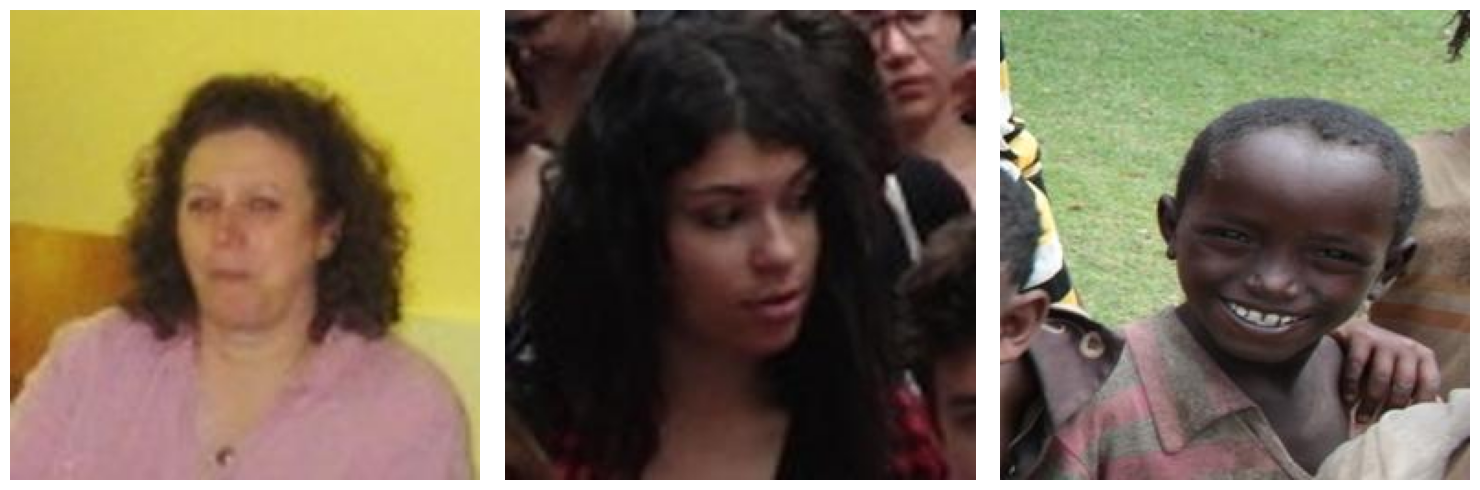

In [9]:
# Real Image Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplot grid
imgs = real['image'].head(3).values  # Get first 3 real images

for ax, img in zip(axes, imgs):
    image = plt.imread(os.path.join(root, 'Real', img))  # Load image
    ax.imshow(image)  # Display image
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

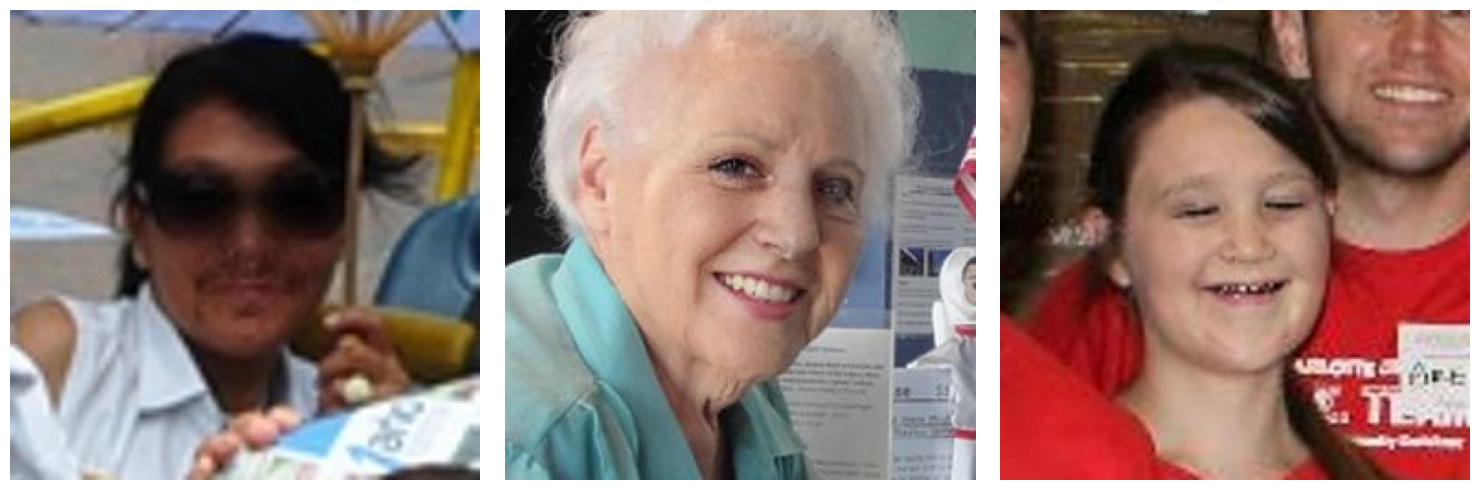

In [10]:
# Fake Image Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplot grid
imgs = fake['image'].head(3).values  # Get first 3 fake images

for ax, img in zip(axes, imgs):
    image = plt.imread(os.path.join(root, 'Fake', img))  # Load image
    ax.imshow(image)  # Display image
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

In [11]:
tempdf=df['class'].value_counts().reset_index()
fig=px.bar(tempdf, x='class' , y='count' ,color='class')
fig.show()

# PREPROCESSING

## CONVERTING IMAGE INTO ARRAY

In [10]:
# Load Images into Memory
image_list = []  # Store processed images
label_list = []  # Store corresponding labels

for folder in raw_classes:
    print(folder)
    for image in tqdm(df[df['class'] == folder]['image'], desc=f"Loading {folder}"):
        image_path = f'/kaggle/input/deepfake-and-real-images/Dataset/Train/{folder}/{image}'  # Build full path
        image = load_image_array(image_path)  # Process image to array
        image_list.append(image)  # Add to image list
        label_list.append(folder)  # Add corresponding label

Fake


Loading Fake: 100%|██████████| 10000/10000 [01:05<00:00, 152.88it/s]


Real


Loading Real: 100%|██████████| 10000/10000 [01:03<00:00, 157.61it/s]


In [11]:
# Data Verification
print(len(image_list))  # Check total images loaded
print(len(label_list))  # Check total labels loaded

20000
20000


## LABLEL ENCODING

In [12]:

# Binary Label Encoding
class_labels = LabelBinarizer()  # Initialize label encoder
labels = class_labels.fit_transform(label_list)  # Convert text labels to binary
os.makedirs('/kaggle/working/model', exist_ok=True)  # Create model directory in current location
pickle.dump(class_labels,open('/kaggle/working/model/label_transform.pkl', 'wb'))  # Save encoder for later use
cls = len(class_labels.classes_)  # Get number of classes
print(class_labels.classes_)  # Display class names

# Show Encoding Mapping
print("\nEncoding Mapping:")
for i, class_name in enumerate(class_labels.classes_):
    binary_code = [0] * len(class_labels.classes_)
    binary_code[i] = 1
    print(f"'{class_name}' → {binary_code}")

['Fake' 'Real']

Encoding Mapping:
'Fake' → [1, 0]
'Real' → [0, 1]


In [27]:
classes=class_labels.classes_

## TRAIN TEST SPLIT

In [13]:
X = np.array(image_list)  # Convert image list to NumPy array
Y = np.array(labels)      # Convert labels list to NumPy array

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)  # Split into 90% train, 10% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=1)  # Split train into 90% train, 10% val

print(X_train.shape)  # Shape of training images
print(X_test.shape)   # Shape of test images
print(X_val.shape)    # Shape of validation images
print(y_train.shape)  # Shape of training labels
print(y_test.shape)   # Shape of test labels
print(np.unique(y_val))  # Unique classes in validation labels


(16200, 128, 128, 3)
(2000, 128, 128, 3)
(1800, 128, 128, 3)
(16200, 1)
(2000, 1)
[0 1]


# CALLBACKS [EARLY STOPPING AND REDUCELRONPLATEAU]

In [14]:
# Callbacks: EarlyStopping and ReduceLROnPlateau

early_stopping=EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=5, # Stop training if val_loss doesn't improve for 5 consecutive epochs
    restore_best_weights=True, # Restore the best model weights after stopping
    verbose=1 # Enable verbose logging when training stops
)

lr_reduce=ReduceLROnPlateau(
    monitor='val_loss', # Monitor validation loss
    patience=3, # Reduce learning rate if no improvement for 3 consecutive epochs
    factor=0.5, # Reduce learning rate by a factor of 0.5
    verbose=1 # Print update messages to console
)


# Model Training 

In [15]:
inputShape = (image_size, image_size, 3)  # Input shape for CNN: (height, width, color channels)
num_classes = cls# Number of output classes
depth = 3# Number of input channels (e.g., RGB = 3)



## CNN

In [18]:
model = Sequential()# Initialize sequential model

inputShape = (image_size, image_size, depth)  # Define input shape

# First Convolutional Block
model.add(Conv2D(128, (3, 3), padding="same", input_shape=inputShape))  # Conv layer with 128 filters
model.add(Activation("relu"))# ReLU activation
model.add(BatchNormalization())# Normalize activations
model.add(MaxPooling2D(pool_size=(3, 3))) # Downsample feature maps
model.add(Dropout(0.25))# Dropout to prevent overfitting

# Second Convolutional Block
model.add(Conv2D(128, (3, 3), padding="same")) 
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())# Flatten feature maps into 1D vector
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))# Increased dropout for FC layer

# Output Layer
model.add(Dense(1))# Single output unit (binary classification)
model.add(Activation("sigmoid"))# Sigmoid for binary classification

model.summary()# Print model architecture


I0000 00:00:1754553725.524624      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754553725.525299      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 42, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 42, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 42, 42, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 42, 42, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 42, 42, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12800)               │          51,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 364,289 (1.39 MB)

 Trainable params: 337,921 (1.29 MB)

 Non-trainable params: 26,368 (103.00 KB)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(
    X_train, y_train, # Training data and labels
    batch_size=32,# Number of samples per gradient update
    epochs=10, # Total number of training epochs
    validation_data=(X_val, y_val), # Validation data for monitoring
    callbacks=[early_stopping,lr_reduce], # Callback for early stopping
    verbose=1  # Verbosity mode (1 = progress bar)
)


Epoch 1/10


I0000 00:00:1752211367.991308     111 service.cc:148] XLA service 0x79e3c4016db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752211367.992635     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752211367.992660     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752211368.650017     111 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/507 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.5052 - loss: 1.1296 

I0000 00:00:1752211376.407338     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


507/507 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.6215 - loss: 0.9663 - val_accuracy: 0.7328 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.7241 - loss: 0.7841 - val_accuracy: 0.7928 - val_loss: 0.5049 - learning_rate: 0.0010
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.7837 - loss: 0.6645 - val_accuracy: 0.8039 - val_loss: 0.5022 - learning_rate: 0.0010
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.8021 - loss: 0.6463 - val_accuracy: 0.8000 - val_loss: 0.5443 - learning_rate: 0.0010
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.8276 - loss: 0.5723 - val_accuracy: 0.7678 - val_loss: 0.7311 - learning_rate: 0.0010
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.8336 - loss: 0.5674 - val_accuracy: 0.8244 - val_loss: 0.4964 - learning_rate: 0.0010
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.8443 - loss: 0.5482

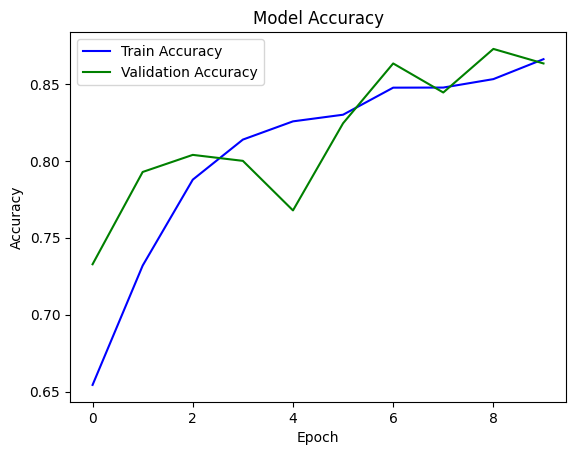

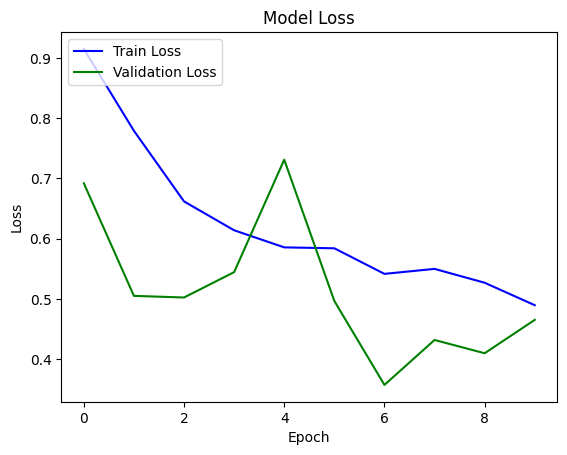

In [24]:
# Accuracy Plot
plt.plot(history.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy') # Training accuracy
plt.plot(history.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy') # Validation accuracy
plt.title('Model Accuracy')# Title of the plot
plt.ylabel('Accuracy')# Y-axis label
plt.xlabel('Epoch') # X-axis label
plt.legend(loc='upper left')# Legend position
plt.show()# Display the plot

# Loss Plot
plt.plot(history.history['loss'], color='blue', linestyle='solid', label='Train Loss')  # Training loss
plt.plot(history.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')# Validation loss
plt.title('Model Loss') # Title of the plot
plt.ylabel('Loss')  # Y-axis label
plt.xlabel('Epoch')  # X-axis label
plt.legend(loc='upper left') # Legend position
plt.show() # Display the plot


In [25]:
pred = model.predict(X_test)  # Predict probabilities on test set
y_pred = np.argmax(pred, axis=1) # Get predicted class labels from probabilities
y_test_org = y_test.flatten() # Flatten y_test in case it's multi-dimensional
y_pred = y_pred.flatten() # Flatten y_pred to match y_test shape


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


In [26]:
cnn = accuracy_score(y_test_org, y_pred) # Compute accuracy score
print("Accuracy Score: ", cnn)  # Print the accuracy


Accuracy Score:  0.5


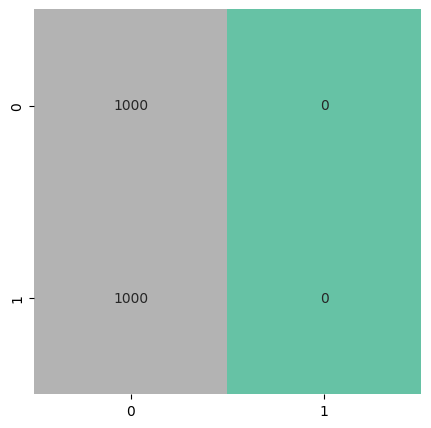

In [27]:
cm = confusion_matrix(y_test_org,y_pred)  # Compute confusion matrix
plt.figure(figsize=(5,5))  # Set figure size
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')  # Plot heatmap with annotations
plt.show()  # Display the plot


In [28]:
print(classification_report(y_test_org,y_pred))  # Print precision, recall, f1-score, and support

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1000
           1       0.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



## Mobilenet

In [25]:
# Load the pre-trained MobileNetV2 model without the top classification layer
mobilenetV2 = MobileNetV2(input_shape=inputShape, include_top=False, weights='imagenet')

# Add a global average pooling layer to reduce feature map dimensions
average_layer = GlobalAveragePooling2D()

# Define the final model using the Sequential API
model = Sequential([
    mobilenetV2,  # Base CNN model for feature extraction (pretrained on ImageNet)
    average_layer,  # Pooling to convert feature maps to a single 1D vector per image
    Dense(64, activation=tf.nn.relu),  # Fully connected layer with ReLU activation
    BatchNormalization(),  # Normalize activations to stabilize and speed up training
    Dropout(0.8),  # Dropout to reduce overfitting (80% dropout rate)
    Dense(2, activation=tf.nn.softmax)  # Output layer for binary classification (2 classes)
])


In [26]:

# Compile the model with optimizer, loss function, and evaluation metric
model.compile(
    optimizer='adam',  # Adam optimizer for efficient gradient descent
    loss='sparse_categorical_crossentropy',  # Loss function for integer-labeled classification
    metrics=['accuracy']  # Metric to evaluate model performance during training and testing
)


In [27]:
history = model.fit(
    X_train, y_train, # Training data and labels
    batch_size=32,# Number of samples per gradient update
    epochs=10, # Total number of training epochs
    validation_data=(X_val, y_val), # Validation data for monitoring
    callbacks=[early_stopping,lr_reduce], # Callback for early stopping
    verbose=1  # Verbosity mode (1 = progress bar)
)


Epoch 1/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 97s 89ms/step - accuracy: 0.8193 - loss: 0.5153 - val_accuracy: 0.9000 - val_loss: 0.3675 - learning_rate: 0.0010
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9469 - loss: 0.1337 - val_accuracy: 0.9461 - val_loss: 0.3953 - learning_rate: 0.0010
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9630 - loss: 0.1029 - val_accuracy: 0.9550 - val_loss: 0.1977 - learning_rate: 0.0010
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9730 - loss: 0.0744 - val_accuracy: 0.9539 - val_loss: 0.3026 - learning_rate: 0.0010
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9738 - loss: 0.0713 - val_accuracy: 0.9072 - val_loss: 0.6135 - learning_rate: 0.0010
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9797 - loss: 0.0543
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
507/507 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9797 - los

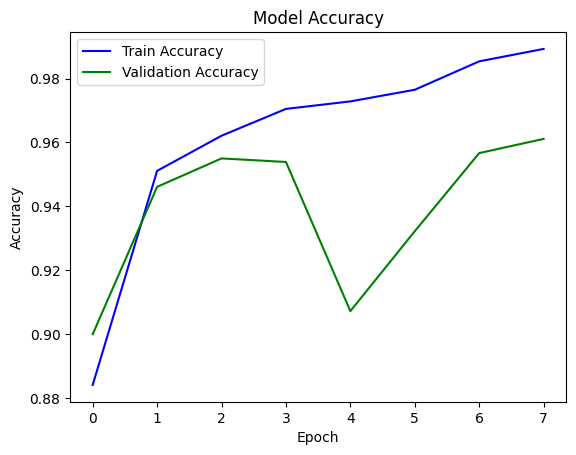

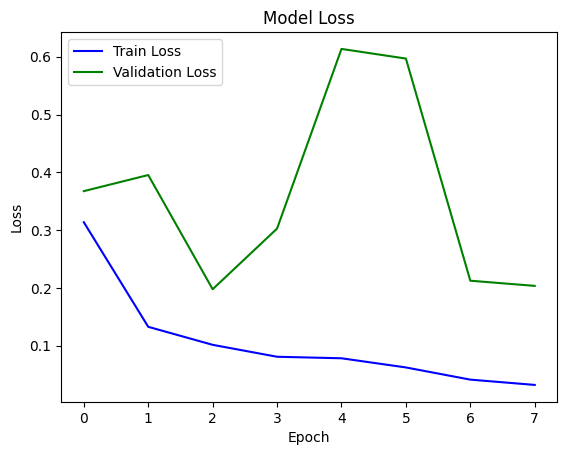

In [28]:
# Accuracy Plot
plt.plot(history.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')  # Training accuracy per epoch
plt.plot(history.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')  # Validation accuracy per epoch
plt.title('Model Accuracy')  # Title of the plot
plt.ylabel('Accuracy')  # Label for y-axis
plt.xlabel('Epoch')  # Label for x-axis
plt.legend(loc='upper left')  # Display legend in upper-left corner
plt.show()  # Show the accuracy plot

# Loss Plot
plt.plot(history.history['loss'], color='blue', linestyle='solid', label='Train Loss')  # Training loss per epoch
plt.plot(history.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')  # Validation loss per epoch
plt.title('Model Loss')  # Title of the plot
plt.ylabel('Loss')  # Label for y-axis
plt.xlabel('Epoch')  # Label for x-axis
plt.legend(loc='upper left')  # Display legend in upper-left corner
plt.show()  # Show the loss plot


In [29]:
# Predict class probabilities on the test set
pred = model.predict(X_test)

# Get the index of the class with the highest probability for each prediction
y_pred = np.argmax(pred, axis=1)

# Flatten the ground truth labels (in case they are in 2D)
y_test_org = y_test.flatten()

# Flatten the predicted labels (for consistency)
y_pred = y_pred.flatten()


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step


In [30]:
# Print the accuracy score by comparing true and predicted labels
print("Accuracy Score: ", accuracy_score(y_test_org, y_pred))
moba= accuracy_score(y_test_org, y_pred)

Accuracy Score:  0.9565


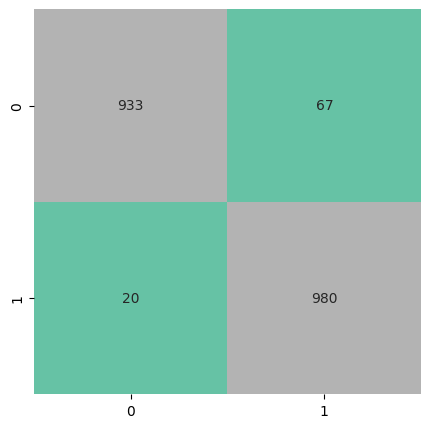

In [31]:
# Generate the confusion matrix comparing true and predicted labels
cm = confusion_matrix(y_test_org, y_pred)

# Set the figure size for the heatmap
plt.figure(figsize=(5,5))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')  # 'annot=True' shows numbers in cells, 'fmt="d"' formats them as integers

# Display the heatmap
plt.show()


In [32]:
# Print precision, recall, f1-score, and support for each class
print(classification_report(y_test_org, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1000
           1       0.94      0.98      0.96      1000

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



## VGG16

In [38]:
# Load the VGG16 model without the top (classification) layer
# and with pre-trained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=inputShape)

# Freeze all layers in the base VGG16 model (prevent them from being trained)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)                    # Flatten the output of the base model
x = Dense(64, activation='relu')(x)                 # Fully connected layer with ReLU activation
x = Dense(2, activation='softmax')(x)               # Output layer for binary classification

# Define the final model with the base model's input and the new output
model = Model(inputs=base_model.input, outputs=x)

# Display the full model architecture
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,239,170 (58.13 MB)

 Trainable params: 524,482 (2.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [40]:
# Compile the model with specified loss function, optimizer, and evaluation metric
model.compile(
    loss='sparse_categorical_crossentropy',  # Use this loss when labels are integers (not one-hot encoded)
    optimizer='adam',                        # Use Adam optimizer for efficient training
    metrics=['accuracy']                     # Monitor accuracy during training and evaluation
)


In [41]:
history3 = model.fit(
    X_train, y_train, # Training data and labels
    batch_size=32,# Number of samples per gradient update
    epochs=10, # Total number of training epochs
    validation_data=(X_val, y_val), # Validation data for monitoring
    callbacks=[early_stopping,lr_reduce], # Callback for early stopping
    verbose=1  # Verbosity mode (1 = progress bar)
)


Epoch 1/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - accuracy: 0.7071 - loss: 1.7342 - val_accuracy: 0.7800 - val_loss: 0.4658 - learning_rate: 0.0010
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.8255 - loss: 0.3681 - val_accuracy: 0.7883 - val_loss: 0.4598 - learning_rate: 0.0010
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.8629 - loss: 0.2922 - val_accuracy: 0.7872 - val_loss: 0.5048 - learning_rate: 0.0010
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.8841 - loss: 0.2538 - val_accuracy: 0.7839 - val_loss: 0.5341 - learning_rate: 0.0010
Epoch 5/10
506/507 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9036 - loss: 0.2076
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
507/507 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.9036 - loss: 0.2077 - val_accuracy: 0.7844 - val_loss: 0.6587 - learning_rate: 0.0010
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.9185 - los

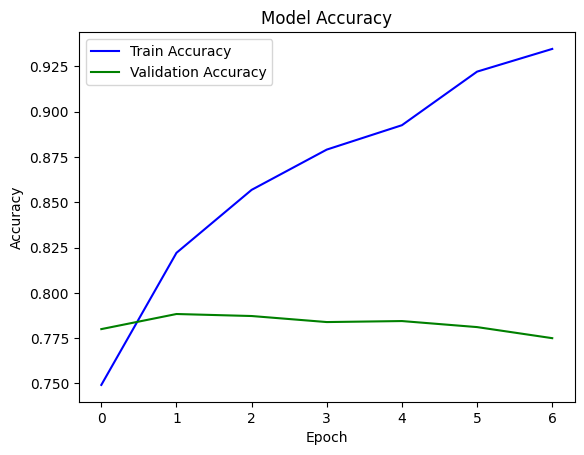

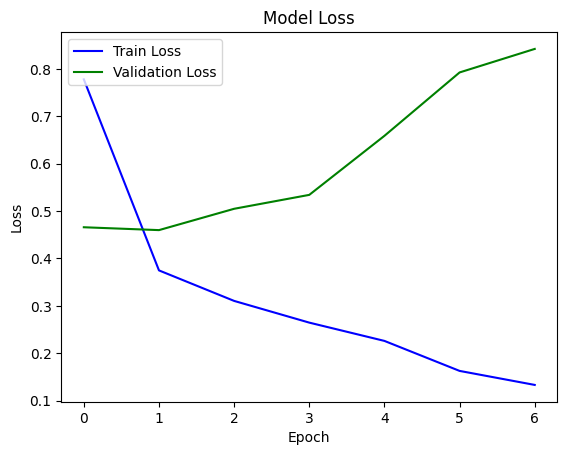

In [43]:
# Plot training and validation accuracy over epochs
plt.plot(history3.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')
plt.title('Model Accuracy')  # Add title to the plot
plt.ylabel('Accuracy')       # Label for y-axis
plt.xlabel('Epoch')          # Label for x-axis
plt.legend(loc='upper left') # Add legend in the upper left corner
plt.show()                   # Display the plot

# Plot training and validation loss over epochs
plt.plot(history3.history['loss'], color='blue', linestyle='solid', label='Train Loss')
plt.plot(history3.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')
plt.title('Model Loss')      # Add title to the plot
plt.ylabel('Loss')           # Label for y-axis
plt.xlabel('Epoch')          # Label for x-axis
plt.legend(loc='upper left') # Add legend in the upper left corner
plt.show()                   # Display the plot


In [44]:
# Predict class probabilities for the test set
pred = model.predict(X_test)

# Convert predicted probabilities to class labels (indices of max prob)
y_pred = np.argmax(pred, axis=1)

# Flatten true test labels to 1D array (in case they are multi-dimensional)
y_test_org = y_test.flatten()

# Flatten predicted labels to 1D array to match true labels shape
y_pred = y_pred.flatten()


63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step


In [45]:
# Print the accuracy score of the model on the test data
print("Accuracy Score: ", accuracy_score(y_test_org, y_pred))

# Store the accuracy score in a variable 'vgg' for later use
vgg = accuracy_score(y_test_org, y_pred)


Accuracy Score:  0.783


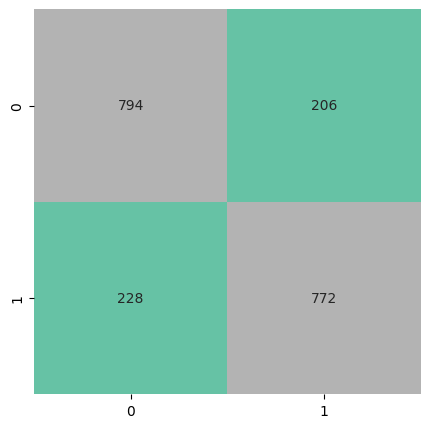

In [46]:
# Compute the confusion matrix between true and predicted labels
cm = confusion_matrix(y_test_org, y_pred)

# Create a new figure with size 5x5 inches
plt.figure(figsize=(5,5))

# Plot the confusion matrix as a heatmap with annotations
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')

# Show the plot
plt.show()


In [47]:
# Print the detailed classification report showing precision, recall, f1-score, and support for each class
print(classification_report(y_test_org, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1000
           1       0.79      0.77      0.78      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



## Xception

In [36]:
# Load the pre-trained Xception model without the top classification layer
xception = Xception(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False)

# Set the entire Xception model to be trainable (allow fine-tuning)
xception.trainable = False

# Build the model using Sequential API
model = Sequential([
    xception,                        # Base Xception model for feature extraction
    GlobalAveragePooling2D(),        # Global average pooling to reduce spatial dimensions
    Dropout(0.8),                  # Dropout layer with 80% dropout rate to reduce overfitting
    Dense(16, activation='relu'),    # Fully connected layer with 32 units and ReLU activation
    Dense(2, activation='softmax')   # Output layer for 2-class classification with softmax activation
])

# Print the model summary to review the architecture and parameters
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 4, 4, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │          32,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,894,298 (79.71 MB)

 Trainable params: 32,818 (128.20 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [37]:
# Compile the model with specified loss, optimizer, and metric
model.compile(
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
    optimizer='adam',                         # Use Adam optimizer for adaptive learning rate
    metrics=['accuracy']                      # Track accuracy during training and evaluation
)


In [38]:
history4 = model.fit(
    X_train, y_train, # Training data and labels
    batch_size=32,# Number of samples per gradient update
    epochs=10, # Total number of training epochs
    validation_data=(X_val, y_val), # Validation data for monitoring
    callbacks=[early_stopping,lr_reduce], # Callback for early stopping
    verbose=1  # Verbosity mode (1 = progress bar)
)


Epoch 1/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.5060 - loss: 1.8713 - val_accuracy: 0.5283 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.5364 - loss: 0.6932 - val_accuracy: 0.6094 - val_loss: 0.6627 - learning_rate: 0.0010
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.5860 - loss: 0.6777 - val_accuracy: 0.6394 - val_loss: 0.6519 - learning_rate: 0.0010
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.6021 - loss: 0.6685 - val_accuracy: 0.6422 - val_loss: 0.6392 - learning_rate: 0.0010
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.6133 - loss: 0.6567 - val_accuracy: 0.6444 - val_loss: 0.6372 - learning_rate: 0.0010
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.6119 - loss: 0.6622 - val_accuracy: 0.6561 - val_loss: 0.6213 - learning_rate: 0.0010
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.6084 - l

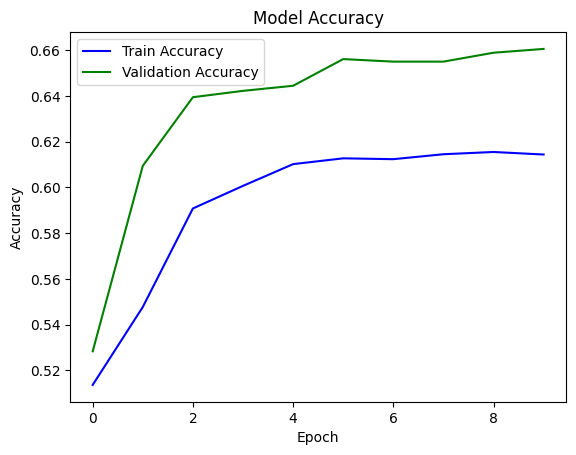

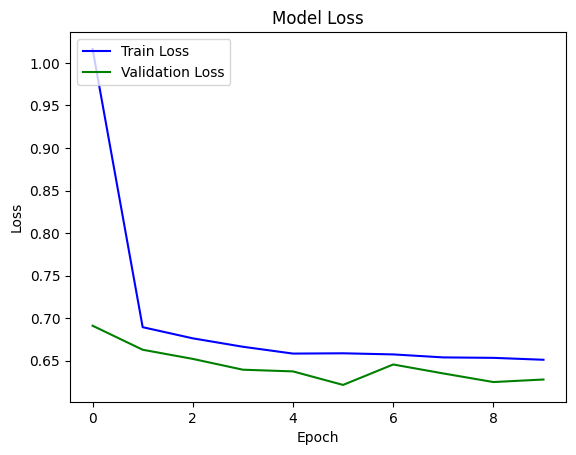

In [39]:
# Plot training and validation accuracy per epoch
plt.plot(history4.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')
plt.title('Model Accuracy')  # Title of the plot
plt.ylabel('Accuracy')       # Y-axis label
plt.xlabel('Epoch')          # X-axis label
plt.legend(loc='upper left') # Legend location
plt.show()                   # Show accuracy plot

# Plot training and validation loss per epoch
plt.plot(history4.history['loss'], color='blue', linestyle='solid', label='Train Loss')
plt.plot(history4.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')
plt.title('Model Loss')      # Title of the plot
plt.ylabel('Loss')           # Y-axis label
plt.xlabel('Epoch')          # X-axis label
plt.legend(loc='upper left') # Legend location
plt.show()                   # Show loss plot


In [40]:
# Predict class probabilities for the test data
pred = model.predict(X_test)

# Convert predicted probabilities to class labels (index with highest probability)
y_pred = np.argmax(pred, axis=1)

# Flatten the original test labels array (in case it is multidimensional)
y_test_org = y_test.flatten()

# Flatten the predicted labels array for consistency
y_pred = y_pred.flatten()


63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step


In [41]:
# Print the accuracy score for predictions on the test set
print("Accuracy Score: ", accuracy_score(y_test_org, y_pred))

# Store the accuracy score in the variable 'excep' for later use
excep = accuracy_score(y_test_org, y_pred)


Accuracy Score:  0.6495


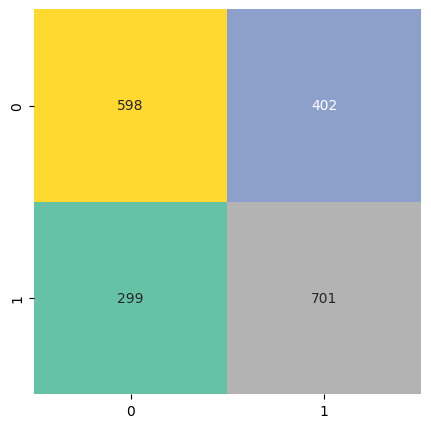

In [42]:
# Compute confusion matrix between true labels and predictions
cm = confusion_matrix(y_test_org, y_pred)

# Set the size of the plot to 5x5 inches
plt.figure(figsize=(5,5))

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')

# Show the plot
plt.show()


In [43]:
# Print the detailed classification report with precision, recall, f1-score, and support
print(classification_report(y_test_org, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.60      0.63      1000
           1       0.64      0.70      0.67      1000

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000



## PLAIN EFFICIENT

In [32]:
# Load EfficientNetB7 model without the top classification layer, with pretrained ImageNet weights
base_model = EfficientNetB7(include_top=False, weights='imagenet', input_shape=inputShape)

# Take the output tensor of the base EfficientNetB7 model
model1 = base_model.output

# Apply dropout with 70% rate to reduce overfitting
model1 = Dropout(0.7)(model1)

# Apply global average pooling to reduce spatial dimensions to a vector
model1 = GlobalAveragePooling2D()(model1)

# Apply dropout with 50% rate to further reduce overfitting
model1 = Dropout(0.5)(model1)

# Add dense layer with 32 units and ReLU activation
model1 = Dense(32, activation='relu')(model1)

# Dropout for regularization
model1 = Dropout(0.5)(model1)

# Add dense layer with 16 units and ReLU activation
model1 = Dense(16, activation='relu')(model1)

# Dropout for regularization
model1 = Dropout(0.5)(model1)

# Add the output layer with 2 units (for 2 classes) and softmax activation
model1 = Dense(2, activation='softmax')(model1)

# Create the final model specifying inputs and outputs
model1 = Model(inputs=base_model.input, outputs=model1)

# Print the model summary to show layers and parameter counts
model1.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 128, 128, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 64)     │          1,728 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 64)     │            256 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 64)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 64)     │            576 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 64)     │            256 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 64)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 64)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 64)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 16)       │          1,040 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 64,180,201 (244.83 MB)

 Trainable params: 63,869,474 (243.64 MB)

 Non-trainable params: 310,727 (1.19 MB)

In [33]:
# Compile the model with sparse categorical crossentropy loss, Adam optimizer, and accuracy metric
model1.compile(
    loss='sparse_categorical_crossentropy',  # Use this loss when labels are integers (not one-hot)
    optimizer='adam',                        # Adam optimizer for adaptive learning rate
    metrics=['accuracy']                     # Track accuracy during training and evaluation
)


In [34]:
history5 = model1.fit(
    X_train, y_train, # Training data and labels
    batch_size=32,# Number of samples per gradient update
    epochs=10, # Total number of training epochs
    validation_data=(X_val, y_val), # Validation data for monitoring
    callbacks=[early_stopping,lr_reduce], # Callback for early stopping
    verbose=1  # Verbosity mode (1 = progress bar)
)


Epoch 1/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 591s 607ms/step - accuracy: 0.7353 - loss: 0.5169 - val_accuracy: 0.9183 - val_loss: 1.2859 - learning_rate: 0.0010
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 191s 377ms/step - accuracy: 0.9300 - loss: 0.2159 - val_accuracy: 0.9583 - val_loss: 0.1338 - learning_rate: 0.0010
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 190s 374ms/step - accuracy: 0.9527 - loss: 0.1457 - val_accuracy: 0.9611 - val_loss: 0.1312 - learning_rate: 0.0010
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 190s 375ms/step - accuracy: 0.9615 - loss: 0.1107 - val_accuracy: 0.9561 - val_loss: 0.1206 - learning_rate: 0.0010
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 190s 374ms/step - accuracy: 0.9713 - loss: 0.0939 - val_accuracy: 0.9578 - val_loss: 0.1455 - learning_rate: 0.0010
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 189s 374ms/step - accuracy: 0.9696 - loss: 0.0804 - val_accuracy: 0.9578 - val_loss: 0.1244 - learning_rate: 0.0010
Epoch 7/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy

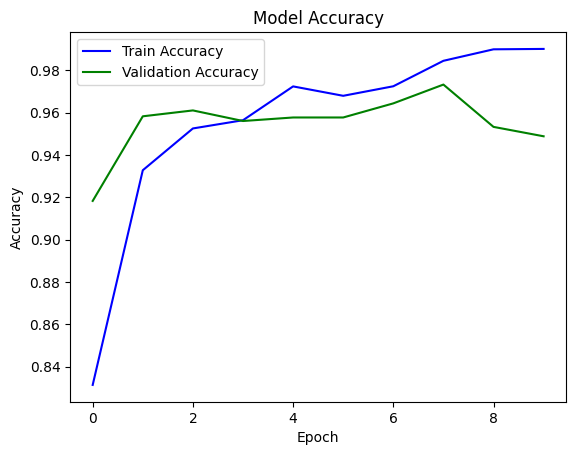

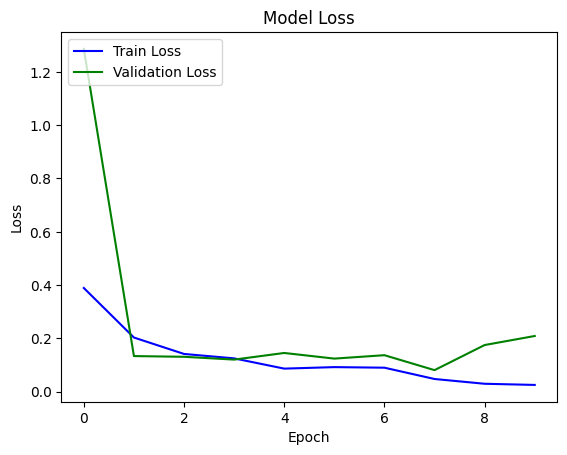

In [39]:
# Plot training and validation accuracy over epochs
plt.plot(history5.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')
plt.title('Model Accuracy')  # Title for accuracy plot
plt.ylabel('Accuracy')       # Y-axis label
plt.xlabel('Epoch')          # X-axis label
plt.legend(loc='upper left') # Show legend at upper left
plt.show()                   # Display accuracy plot

# Plot training and validation loss over epochs
plt.plot(history5.history['loss'], color='blue', linestyle='solid', label='Train Loss')
plt.plot(history5.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')
plt.title('Model Loss')      # Title for loss plot
plt.ylabel('Loss')           # Y-axis label
plt.xlabel('Epoch')          # X-axis label
plt.legend(loc='upper left') # Show legend at upper left
plt.show()                   # Display loss plot


In [40]:
# Predict class probabilities on the test set using the model
pred = model1.predict(X_test)

# Get the predicted class by selecting the index with highest probability for each sample
y_pred = np.argmax(pred, axis=1)

# Flatten the true test labels to 1D array
y_test_org = y_test.flatten()

# Flatten the predicted labels to 1D array for consistency
y_pred = y_pred.flatten()


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step


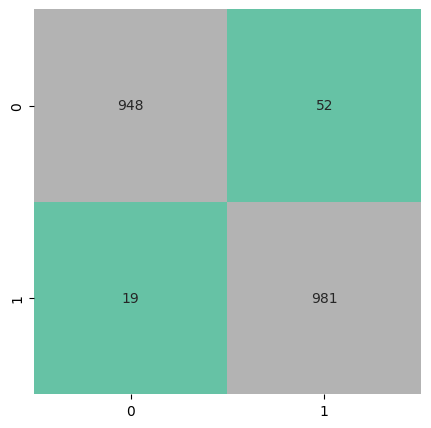

In [41]:
# Compute confusion matrix between true and predicted labels
cm = confusion_matrix(y_test_org, y_pred)

# Set figure size for the heatmap
plt.figure(figsize=(5,5))

# Plot confusion matrix as heatmap with annotations and no color bar
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')

# Display the heatmap plot
plt.show()


In [42]:
# Calculate the accuracy score on test data predictions
eff = accuracy_score(y_test_org, y_pred)

# Print the detailed classification report (precision, recall, f1-score, support)
print(classification_report(y_test_org, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1000
           1       0.95      0.98      0.97      1000

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.96      0.96      2000



In [43]:
# Save the entire model in TensorFlow's SavedModel format with '.keras' extension
model1.save('/kaggle/working/my_model_plain.keras')

# Save the entire model in HDF5 format with '.h5' extension
model1.save('/kaggle/working/my_model_plain.h5')


## Efficienet with attention

In [16]:

# Attention block function
def attention_block(features, depth):
    attn = Conv2D(256, (1, 1), padding='same', activation='relu')(Dropout(0.5)(features)) # Apply dropout and conv layer
    attn = Conv2D(128, (1, 1), padding='same', activation='relu')(attn) # Additional conv layer
    attn = Conv2D(128, (1, 1), padding='same', activation='relu')(attn) # Additional conv layer
    attn = Conv2D(1, (1, 1), padding='valid', activation='sigmoid')(attn) # Output attention map

    up = Conv2D(depth, (1, 1), padding='same', activation='linear', use_bias=False) # Layer to match channel depth
    up_w = np.ones((1, 1, 1, depth), dtype=np.float32) # Initialize with ones
    up.build((None, None, None, 1)) # Build with dummy input shape
    up.set_weights([up_w]) # Set weights
    up.trainable = True # Make trainable

    attn = up(attn) # Expand attention map to match feature dimensions
    masked = multiply([attn, features]) # Apply attention by element-wise multiplication

    gap_feat = GlobalAveragePooling2D()(masked) # Global average pooling on masked features
    gap_mask = GlobalAveragePooling2D()(attn) # Global average pooling on attention weights
    gap = Lambda(lambda x: x[0] / x[1], name='RescaleGAP')([gap_feat, gap_mask]) # Normalize features
    return gap

# Input size
inputShape = (128, 128, 3)

# Load EfficientNetB7 base
base_model = EfficientNetB7(include_top=False, weights='imagenet', input_shape=inputShape) # Load EfficientNetB7 without top layer
base_model.trainable = True # Make base model trainable

# Attention-enhanced features
features = base_model.output # Extract output features
bn_features = BatchNormalization()(features) # Apply batch normalization
pt_depth = base_model.output_shape[-1] # Get depth of feature maps
gap = attention_block(bn_features, pt_depth) # Apply attention block

# Classification head (regularized)
x = Dropout(0.5)(gap) # Dropout for regularization
x = Dense(64, activation='relu', kernel_regularizer=l2(0.00001))(x) # Dense layer with L2 regularization
x = Dropout(0.25)(x) # Dropout
output = Dense(2, activation='softmax')(x) # Output layer for binary classification

# Final model
model = Model(inputs=base_model.input, outputs=output) # Create final model
model.summary() # Print model architecture summary


I0000 00:00:1754560653.916114      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754560653.916835      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 128, 128, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 64)     │          1,728 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 64)     │            256 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 64)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 64)     │            576 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 64)     │            256 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 64)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 64)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 64)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 16)       │          1,040 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 64,979,674 (247.88 MB)

 Trainable params: 64,663,827 (246.67 MB)

 Non-trainable params: 315,847 (1.20 MB)

In [17]:
# Compile the model specifying the loss function, optimizer, and metrics
model.compile(
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-labeled classification
    optimizer='adam',                         # Use Adam optimizer for adaptive learning rate optimization
    metrics=['accuracy']                      # Evaluate model performance based on accuracy
)


In [18]:
history6 = model.fit(
    X_train, y_train, # Training data and labels
    batch_size=32,# Number of samples per gradient update
    epochs=10, # Total number of training epochs
    validation_data=(X_val, y_val), # Validation data for monitoring
    callbacks=[early_stopping,lr_reduce], # Callback for early stopping
    verbose=1  # Verbosity mode (1 = progress bar)
)


Epoch 1/10


I0000 00:00:1754560856.314298     111 service.cc:148] XLA service 0x787dd8065430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754560856.315173     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754560856.315195     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1754560873.510807     111 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1754560896.691478     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754560896.830688     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754560897.145638     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. Th

506/507 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.8213 - loss: 0.3924

E0000 00:00:1754561163.903621     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754561164.061504     111 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


507/507 ━━━━━━━━━━━━━━━━━━━━ 595s 600ms/step - accuracy: 0.8216 - loss: 0.3919 - val_accuracy: 0.9183 - val_loss: 0.1970 - learning_rate: 0.0010
Epoch 2/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 175s 345ms/step - accuracy: 0.9571 - loss: 0.1340 - val_accuracy: 0.9650 - val_loss: nan - learning_rate: 0.0010
Epoch 3/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 175s 345ms/step - accuracy: 0.9735 - loss: 0.0844 - val_accuracy: 0.9711 - val_loss: 0.0920 - learning_rate: 0.0010
Epoch 4/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 174s 343ms/step - accuracy: 0.9774 - loss: 0.0640 - val_accuracy: 0.9633 - val_loss: 0.1380 - learning_rate: 0.0010
Epoch 5/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 174s 343ms/step - accuracy: 0.9825 - loss: 0.0502 - val_accuracy: 0.9711 - val_loss: 0.1109 - learning_rate: 0.0010
Epoch 6/10
507/507 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9846 - loss: 0.0440
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
507/507 ━━━━━━━━━━━━━━━━━━━━ 173s 341ms/step - accuracy: 0.9846 - loss

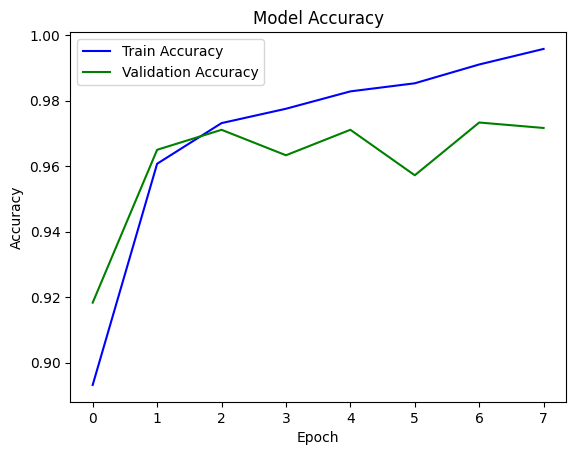

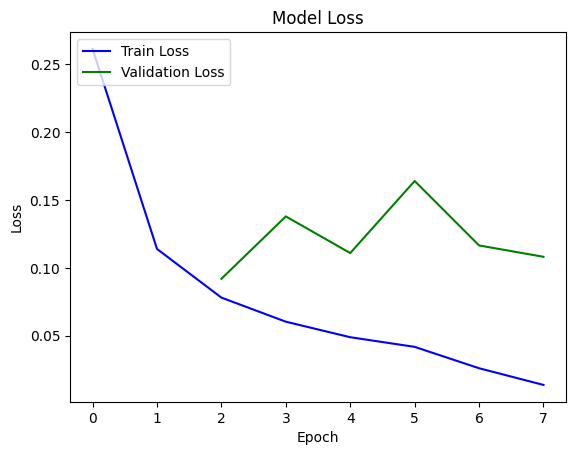

In [19]:
# Plot training and validation accuracy over epochs
plt.plot(history6.history['accuracy'], color='blue', linestyle='solid', label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], color='green', linestyle='solid', label='Validation Accuracy')
plt.title('Model Accuracy')   # Title of the accuracy plot
plt.ylabel('Accuracy')        # Label for y-axis
plt.xlabel('Epoch')           # Label for x-axis
plt.legend(loc='upper left')  # Legend location
plt.show()                   # Display the accuracy plot

# Plot training and validation loss over epochs
plt.plot(history6.history['loss'], color='blue', linestyle='solid', label='Train Loss')
plt.plot(history6.history['val_loss'], color='green', linestyle='solid', label='Validation Loss')
plt.title('Model Loss')       # Title of the loss plot
plt.ylabel('Loss')            # Label for y-axis
plt.xlabel('Epoch')           # Label for x-axis
plt.legend(loc='upper left')  # Legend location
plt.show()                   # Display the loss plot


In [20]:
# Predict class probabilities on the test set using the model
pred = model.predict(X_test)

# Convert predicted probabilities to class labels by taking the index with the highest probability
y_pred = np.argmax(pred, axis=1)

# Flatten the true test labels to 1D array for comparison
y_test_org = y_test.flatten()

# Flatten the predicted labels array to 1D as well
y_pred = y_pred.flatten()


63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 426ms/step


In [21]:
# Calculate and print the accuracy score comparing true and predicted labels
print("Accuracy Score: ", accuracy_score(y_test_org, y_pred))


Accuracy Score:  0.9665


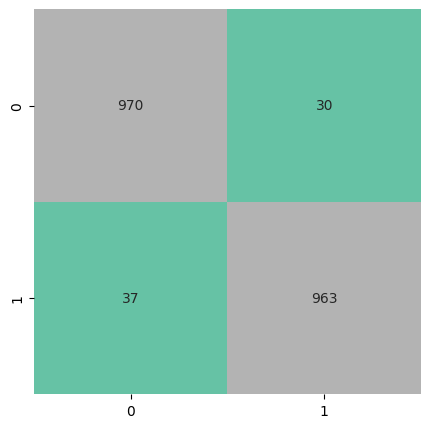

In [22]:
# Compute confusion matrix from true and predicted labels
cm = confusion_matrix(y_test_org, y_pred)

# Set figure size for better visualization
plt.figure(figsize=(5,5))

# Plot confusion matrix as a heatmap with annotations, no color bar, integer format, and Set2 color map
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Set2')

# Display the plot
plt.show()


In [23]:
# Calculate accuracy score for predictions and store in 'eff_att' variable
eff_att = accuracy_score(y_test_org, y_pred)

# Print detailed classification report including precision, recall, f1-score, and support for each class
print(classification_report(y_test_org, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1000
           1       0.97      0.96      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [78]:
# Save the entire model in HDF5 format with .h5 extension
model.save('/kaggle/working/best_model_effatt.h5')

# Save the entire model in TensorFlow SavedModel format with .keras extension
model.save('/kaggle/working/best_model_effatt.keras')



## TEST

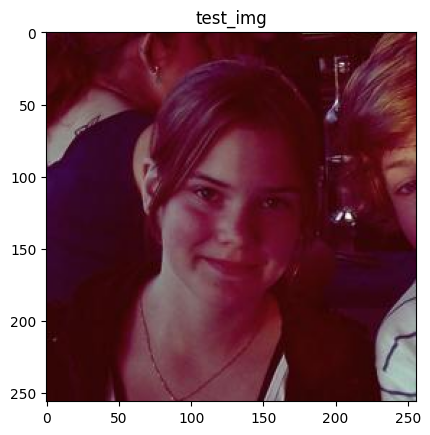

In [24]:
# Specify the path to the test image
img = '/kaggle/input/deepfake-and-real-images/Dataset/Test/Real/real_0.jpg'

# Read the image from the specified path
test_img = plt.imread(img)

# Display the image
plt.imshow(test_img)
plt.title("test_img")  # Set the title for the image plot
plt.axis('off')       # Optional: hide axis ticks for a cleaner look
plt.show()            # Show the image


In [25]:
# Load image and convert to numpy array using your custom function load_image_array
img = load_image_array(img)

# Print number of dimensions of the image array
print(img.ndim)

# If image is 3D (height, width, channels), expand dimensions to add batch size dimension
if img.ndim == 3:
    img = np.expand_dims(img, axis=0)  # Now shape is (1, height, width, channels)

# Load the trained model from saved file
model = load_model('/kaggle/working/my_model_plain.h5')

# Predict the class probabilities for the image batch
prediction = model12.predict(img)

# Get the predicted class index with highest probability
answer = np.argmax(prediction)

# Print predicted class index
print(answer)

# Convert the class index back to original class label using inverse_transform
answer = class_labels.inverse_transform([answer])

# Print the predicted class label (e.g., 'Real' or 'Fake')
print(answer)


3


I0000 00:00:1750407413.740148    1939 service.cc:148] XLA service 0x7b195c059a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750407413.746114    1939 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750407413.746153    1939 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1
['Real']


I0000 00:00:1750407420.784889    1939 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [43]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np
import cv2

image='/kaggle/input/deepfake-and-real-images/Dataset/Test/Fake/fake_1047.jpg'

def preprocess_image(filepath):
  try:
    img = cv2.imread(filepath)  # Load image using OpenCV
    if img is not None:
      img = cv2.resize(img, default_image_size)  # Resize to standard dimensions
      return img_to_array(img)  # Convert to numpy array for neural network
    else:
      return np.array([])
  except Exception as e:
    print(f"Error - {e}")
    return None

# Function that LIME will call
def predict_fn(images):
    return model.predict(np.array(images))

# Prepare image for explanation
lime_image_input = preprocess_image(image)

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

In [46]:
from skimage.color import label2rgb
# Run LIME
explanation = explainer.explain_instance(
    lime_image_input,
    classifier_fn=predict_fn,
    top_labels=3,
    hide_color=0,
    num_samples=1000
)

# Get explanation mask
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=False,
    hide_rest=False,
    num_features=3,  #number or areas/superpixels should be highlighted
    min_weight=0.0
)

# Overlay important regions on the original image
original_img_bgr = cv2.imread(image)
original_img_bgr = cv2.resize(original_img_bgr, default_image_size)
original_img_rgb = cv2.cvtColor(original_img_bgr, cv2.COLOR_BGR2RGB)

highlight = mark_boundaries(original_img_rgb / 255.0, mask)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━

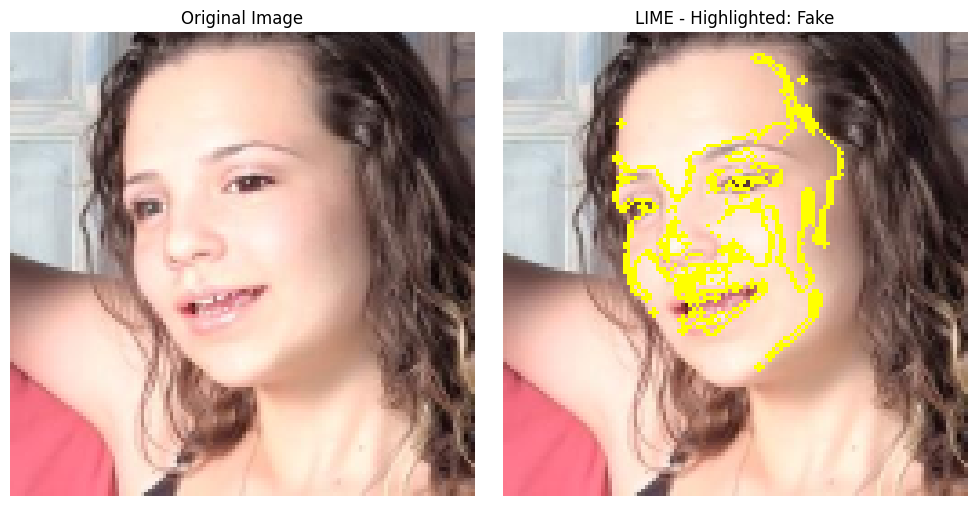

In [47]:

# Display
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title("Original Image")
plt.axis('off')

# LIME explanation
plt.subplot(1, 2, 2)
plt.imshow(highlight)
plt.title(f"LIME - Highlighted: {classes[explanation.top_labels[0]]}")
plt.axis('off')

plt.tight_layout()
plt.show()